**Business Card Reader**

This project aims to develop a business card scanner using OCR (Optical Character Recognition) technology. The system allows users to capture images of business cards using a smartphone camera or scanner and automatically extract relevant information, such as the person's name, title, company, phone number, and email address.
The project utilizes Python programming language and popular libraries. OCR (Optical Character Recognition) technology used to create a business card scanner. The trained model will scan business cards and extract data.
Basically, this project will be broken down into three phases: classification, OCR, and image processing (noise cancellation) (classifying key properties).


We will perform following steps:

1.Learn how to detect business cards in images

2.Apply OCR to a business card image

3.Utilize regular expressions to extract: Name, Job Title, Email, Phone Number
   


In [ ]:
import cv2
from imutils.perspective import four_point_transform
import argparse
import imutils
import re
from google.colab.patches import cv2_imshow


# Using cv2.imread() method
# Using 0 to read image in grayscale mode
img = cv2.imread("001.jpg")

we load our input image from and then clone it. We make it a clone to extract the original high-resolution version of the business card after contour processing.

In [ ]:
image = img.copy()
image = imutils.resize(image, width=600)
ratio = img.shape[1] / float(image.shape[1])

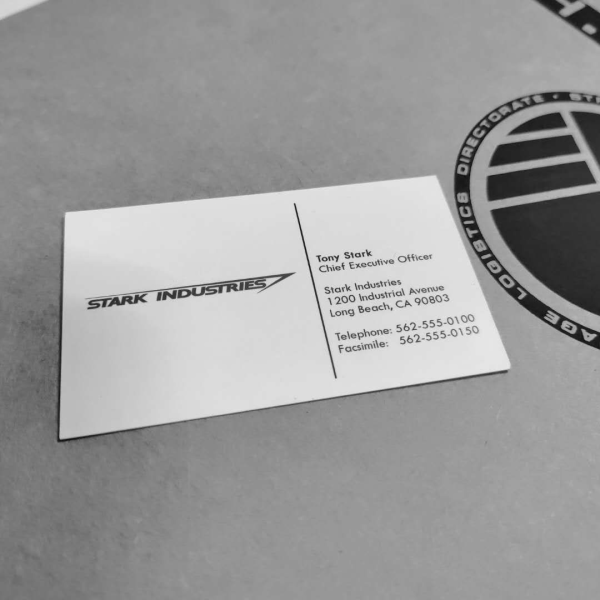

In [ ]:
# convert the image to grayscale,
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

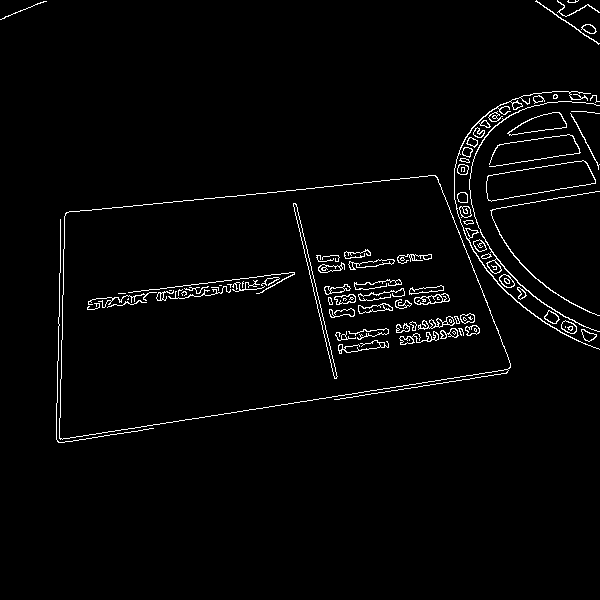

In [ ]:
 #blur it, and apply edge detection
# to reveal the outline of the business card

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
cv2_imshow(edged)

In [ ]:
# detect contours in the edge map, sort them by size (in descending
# order), and grab the largest contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

In [ ]:
# initialize a contour that corresponds to the business card outline
cardCnt = None

In [ ]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("--debug", type=int, default=-1,help="whether or not we are visualizing each step of the pipeline")
ap.add_argument("--min-conf", type=int, default=0,help="minimum confidence value to filter weak text detection")
args = vars(ap.parse_args(""))

In [ ]:
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# if this is the first contour we've encountered that has four
	# vertices, then we can assume we've found the business card
	if len(approx) == 4:
		cardCnt = approx
		break
# if the business card contour is empty then our script could not
# find the  outline of the card, so raise an error
if cardCnt is None:
	raise Exception(("Could not find receipt outline. "
		"Try debugging your edge detection and contour steps."))

In [ ]:
# check to see if we should draw the contour of the business card
# on the image and then display it to our screen
if args["debug"] > 0:
	output = image.copy()
	cv2.drawContours(output, [cardCnt], -1, (0, 255, 0), 2)
	cv2.imshow(output)
	cv2.waitKey(0)

In [ ]:
# apply a four-point perspective transform to the *original* image to
# obtain a top-down bird's-eye view of the business card
card = four_point_transform(img, cardCnt.reshape(4, 2) * ratio)


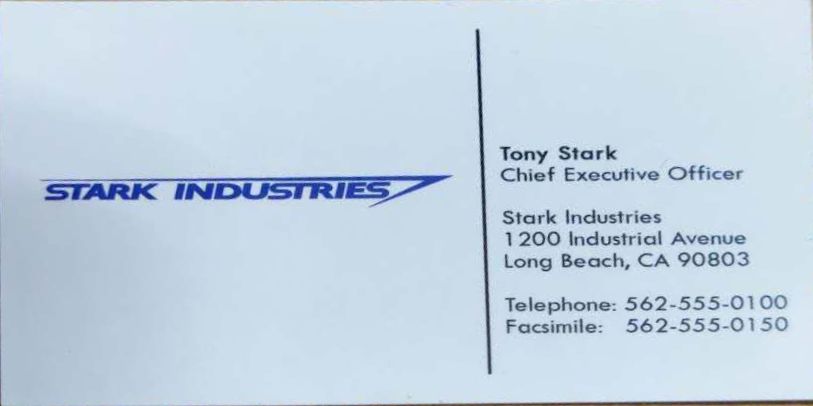

-1

In [ ]:
# show transformed image
cv2_imshow(card)
cv2.waitKey(0)

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (12.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [ ]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract
import re


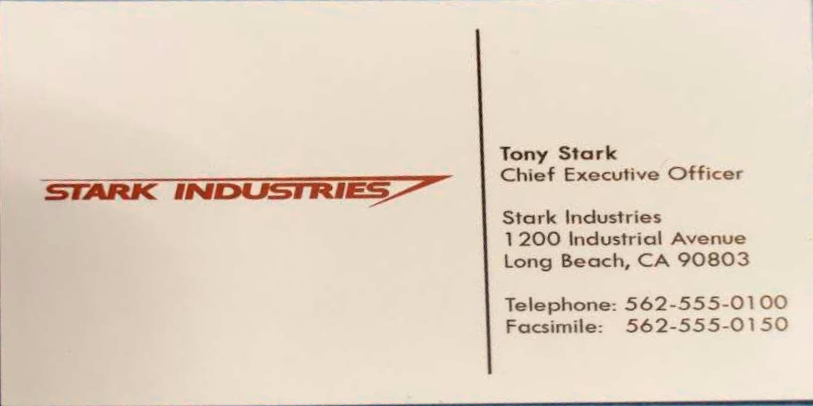

In [ ]:
# convert the business card from BGR to RGB channel ordering and then
# OCR it
rgb = cv2.cvtColor(card, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)
text = pytesseract.image_to_string(rgb)

In [ ]:
# use regular expressions to parse out phone numbers and email
# addresses from the business card
phoneNums = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)

In [ ]:
# attempt to use regular expressions to parse out names/titles (not
# necessarily reliable)
nameExp = r"^[\w'\-,.][^0-9_!¡?÷?¿/\\+=@#$%ˆ&*(){}|~<>;:[\]]{2,}"
names = re.findall(nameExp, text)

In [ ]:
# show the phone numbers header
print("PHONE NUMBERS")
print("=============")
# loop over the detected phone numbers and print them to our terminal
for num in phoneNums:
	print(num.strip())
# show the email addresses header
print("\n")
print("EMAILS")
print("======")
# loop over the detected email addresses and print them to our
# terminal
for email in emails:
	print(email.strip())
# show the name/job title header
print("\n")
print("NAME/JOB TITLE")
print("==============")
# loop over the detected name/job titles and print them to our
# terminal
for name in names:
	print(name.strip())

PHONE NUMBERS
562-555-0100
562-555-0150


EMAILS


NAME/JOB TITLE
Tony Stark
Chief Executive Officer

Stark Industries


Refrences :

https://pyimagesearch.com/2021/11/03/ocring-business-cards/

https://www.geeksforgeeks.org/visiting-card-scanner-gui-application-using-python/

https://medium.com/@gabrielwaked/how-to-extract-text-from-a-photo-of-a-business-card-using-python-df0e1cfa0a75